# Approaching Categorical Variables I 

There are 2 main categorical variable types: nominal and ordinal. Nominal variables do not have any order to them. On the contrary, ordinal variables can be ranked. In this section, we use ["cat in the dat"](https://www.kaggle.com/c/cat-in-the-dat-ii/data) categorical challenge. Purpose of this dataset is to decide whether given datapoint is a cat or not, therefore `target` variable is binary {0,1}.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

This is initial dataset loading step. Feature values will be constantly changing so it's a good idea to keep an original as `df_org`

In [3]:
df_org = pd.read_csv("data/catinthedat_train.csv").drop("id", axis=1)
df = df_org.copy(deep=True)
df.columns, df.dtypes

(Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2',
        'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0',
        'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month', 'target'],
       dtype='object'),
 bin_0     float64
 bin_1     float64
 bin_2     float64
 bin_3      object
 bin_4      object
 nom_0      object
 nom_1      object
 nom_2      object
 nom_3      object
 nom_4      object
 nom_5      object
 nom_6      object
 nom_7      object
 nom_8      object
 nom_9      object
 ord_0     float64
 ord_1      object
 ord_2      object
 ord_3      object
 ord_4      object
 ord_5      object
 day       float64
 month     float64
 target      int64
 dtype: object)

<AxesSubplot:xlabel='target', ylabel='Count'>

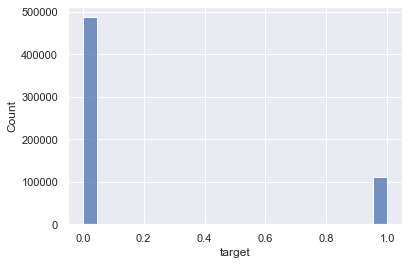

In [5]:
sns.histplot(data=df, x="target")

Target is skewed so accuracy metric is out the door. We need an appropriate metric such as AUC for ROC or precision/recall. Before mapping a feature to new values, let's show value counts of feature `ord_2`.

In [13]:
df.ord_2.value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

Now we can employ **label encoding** which is turning the values of categorical features into numerical values.

In [14]:
df = df_org.copy()

mapping = {
    "Freezing":0,
    "Cold":1,
    "Warm":2,
    "Hot":3,
    "Boiling Hot":4,
    "Lava Hot":5
}

df.loc[:,"ord_2"] = df_org.ord_2.map(mapping)
print(df.ord_2.value_counts())

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()


0.0    142726
2.0    124239
1.0     97822
4.0     84790
3.0     67508
5.0     64840
Name: ord_2, dtype: int64

This time we use label encoding method of scikit-learn library. Since Scikit-learn doesn't handle nan valuess we need to fill them with our preference. However one should note that the official documentation discourages using `LabelEncoder` for feature processing. It's recommended such that this class should be used for target encoding.

In [20]:
from sklearn.preprocessing import LabelEncoder

df = df_org.copy()
df.ord_2 = df.ord_2.fillna("NONE") 

# Label encoder uses string and assigns values alphabetically 
label_encoder = LabelEncoder()
df.loc[:,"ord_2"] = label_encoder.fit_transform(df.ord_2.values)

# Let's compare the order with the original categories
print(f'{df.ord_2.value_counts().sort_index()} \n\n{df_org.ord_2.value_counts().sort_index()}')

0     84790
1     97822
2    142726
3     67508
4     64840
5     18075
6    124239
Name: ord_2, dtype: int64 

Boiling Hot     84790
Cold            97822
Freezing       142726
Hot             67508
Lava Hot        64840
Warm           124239
Name: ord_2, dtype: int64


Be aware of the mechanism `label_encoder` assigns values. Instead of literal meanings, order is given alphabetically. If numerical values were to indicate a rank, giving the value 0 to `freezing` would be more appropriate. Instead, it is ranked third. Additionally, 'nan' values are also taken care of in scikit method.

Categorical encoding cannot be used with linear models, svm and neural networks which expect data to be normalized or standardized. Numerically, values must be between 0 and 1. 

In [21]:
from sklearn.preprocessing import OneHotEncoder

example = np.random.randint(1000, size=1000)
ohe = OneHotEncoder(sparse=False)
ohe_example = ohe.fit_transform(example.reshape(-1,1))
print(f"Size of dense array: {ohe_example.nbytes / 1_000_000} MBs")

ohe = OneHotEncoder(sparse=True)
ohe_example = ohe.fit_transform(example.reshape(-1,1))
print(f"Size of sparse array: {ohe_example.data.nbytes / 1_000_000} MBs")

Size of dense array: 5.248 MBs
Size of sparse array: 0.008 MBs


When dealing with categorical features, a value not inside defined range of feature causes errors. Your production model needs to be robust in these new occasions. This new value is known as the “rare”. A rare value is not seen very often and might differ drastically. You can also try to “predict” the unknown category by using a nearest neighbour model. Remember, if you predict this category, it will become one of the categories from the training data.

In [22]:
train = pd.read_csv("data/catinthedat_train.csv")
test = pd.read_csv("data/catinthedat_test.csv")
test["target"] = -1

In [23]:
for col in train.columns[1:]: #excluding id
    print(col, train[col].unique()[:5])

bin_0 [ 0.  1. nan]
bin_1 [ 0.  1. nan]
bin_2 [ 0.  1. nan]
bin_3 ['F' 'T' nan]
bin_4 ['N' 'Y' nan]
nom_0 ['Red' 'Blue' 'Green' nan]
nom_1 ['Trapezoid' 'Star' nan 'Circle' 'Triangle']
nom_2 ['Hamster' 'Axolotl' 'Lion' 'Dog' 'Cat']
nom_3 ['Russia' nan 'Canada' 'Finland' 'Costa Rica']
nom_4 ['Bassoon' 'Theremin' nan 'Oboe' 'Piano']
nom_5 ['de4c57ee2' '2bb3c3e5c' 'b574c9841' '673bdf1f6' '777d1ac2c']
nom_6 ['a64bc7ddf' '3a3a936e8' '708248125' '23edb8da3' '3a7975e46']
nom_7 ['598080a91' '1dddb8473' '5ddc9a726' '3a33ef960' 'bc9cc2a94']
nom_8 ['0256c7a4b' '52ead350c' '745b909d1' 'bdaa56dd1' nan]
nom_9 ['02e7c8990' 'f37df64af' nan 'f9d456e57' 'c5361037c']
ord_0 [ 3.  1.  2. nan]
ord_1 ['Contributor' 'Grandmaster' nan 'Novice' 'Expert']
ord_2 ['Hot' 'Warm' 'Freezing' 'Lava Hot' 'Cold']
ord_3 ['c' 'e' 'n' 'a' 'h']
ord_4 ['U' 'X' 'P' 'C' 'Q']
ord_5 ['Pw' 'pE' 'eN' nan 'OZ']
day [6. 7. 5. 3. 1.]
month [ 3.  7.  9. 12.  4.]
target [0 1]


We have some `nan` values in certain features. Before transforming the values let's fill `nan` values with 'NONE' string.

In [24]:
train = train.fillna('NONE')
test = test.fillna('NONE')

Now we need to confirm all `nan` values are replaced with 'NONE'.

In [25]:
for col in train.columns[1:]: #excluding id
    print(col, train[col].unique()[:10])

bin_0 [0.0 1.0 'NONE']
bin_1 [0.0 1.0 'NONE']
bin_2 [0.0 1.0 'NONE']
bin_3 ['F' 'T' 'NONE']
bin_4 ['N' 'Y' 'NONE']
nom_0 ['Red' 'Blue' 'Green' 'NONE']
nom_1 ['Trapezoid' 'Star' 'NONE' 'Circle' 'Triangle' 'Polygon' 'Square']
nom_2 ['Hamster' 'Axolotl' 'Lion' 'Dog' 'Cat' 'Snake' 'NONE']
nom_3 ['Russia' 'NONE' 'Canada' 'Finland' 'Costa Rica' 'China' 'India']
nom_4 ['Bassoon' 'Theremin' 'NONE' 'Oboe' 'Piano']
nom_5 ['de4c57ee2' '2bb3c3e5c' 'b574c9841' '673bdf1f6' '777d1ac2c' 'a2e1bf0b1'
 '87a5be0d7' '104aee31d' '024efa364' '9fa084b36']
nom_6 ['a64bc7ddf' '3a3a936e8' '708248125' '23edb8da3' '3a7975e46' 'ae6737c29'
 'cdc35bd00' '2a50808ba' 'a4a81ab45' 'e7aa94f40']
nom_7 ['598080a91' '1dddb8473' '5ddc9a726' '3a33ef960' 'bc9cc2a94' '8c30b9b0b'
 '1cba571fa' '81d67e1bb' '429114096' '56d35c774']
nom_8 ['0256c7a4b' '52ead350c' '745b909d1' 'bdaa56dd1' 'NONE' '690411ac0'
 'b8e63cace' 'bd9643a20' '94c5fd40c' '0279391c5']
nom_9 ['02e7c8990' 'f37df64af' 'NONE' 'f9d456e57' 'c5361037c' '05afc0f8b'
 '4d37

Let's write a function to check unique values between train and test. We exclude the id feature because all the values are unique and throws a warning

In [26]:
def check_unique(train, test):    
    unique_values = {}
    
    for col in train.columns:
        if 'id' == col:
            continue
        
        train_array = list(train[col].unique())
        if 'NONE' in train_array:
            train_array.remove('NONE')
        train_set = set(train_array)
        
        test_array = list(test[col].unique())
        if 'NONE' in test_array:
            test_array.remove('NONE')
        test_set = set(test_array)
        
        
        difference = set(list(test_set.difference(train_set)) + list(train_set.difference(test_set)))
        
        if len(difference) > 0:
            print(f'Rare feature: {col}')
            unique_values[col] = difference
            print(difference)
            
    return unique_values
    
unique_values = check_unique(train, test)

Rare feature: nom_5
{'b3ad70fcb'}
Rare feature: nom_6
{'a885aacec', 'f0732a795', '3a121fefb', 'ee6983c6d'}
Rare feature: nom_9
{'3d19cd31d', '1065f10dd'}
Rare feature: target
{0, 1, -1}


We need to exclude `id` feature due to excessive amount of unique elements. Now we can run label encoder on every feature using scikit-learn. 

In [29]:
data = pd.concat([train, test], axis=0).reset_index(drop=True)
features = [x for x in data.columns if x not in ["id", "target"]]

for feat in features:
    lbl_enc = LabelEncoder()
    temp_col = data[feat].fillna("NONE").astype(str).values
    data.loc[:,feat] = lbl_enc.fit_transform(temp_col)
    
train = data[data.target != -1].reset_index(drop=True)
test = data[data.target == -1].reset_index(drop=True)

Going back to original dataset, this time we determine a criteria to identify certain values of a feature as rare and label them as such.

In [32]:
df = df_org.copy(deep=True)
df.ord_4 = df.ord_4.fillna('NONE')
df.ord_4.value_counts()

N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
G        3404
V        3107
J        1950
L        1657
Name: ord_4, dtype: int64

We have approximately 18000 `nan` values and some values fewer than 2000. For values occurring less than 2000 times, they will be changed to 'Rare'. However, there is a little bit `pandas` magic in the book and needs to be explained in detail. Code in the book is as follow:

```python
>> df.ord_4 = df.ord_4.fillna("NONE")
>> df.loc[
    df["ord_4"].value_counts()[df["ord_4"]].values < 2000, "ord_4"
] = "RARE"
```
- This will map every value with count less than 2000 to 'RARE'. So how does it work? Let's decompose the code.

- We need an index for all rows of `df['ord_4']`, in this case a boolean mask, indicating values having counts more than 2000. But, at first look it's not clear how `df['ord_4']` indexes `df["ord_4"].value_counts()[]`. We know that bracket `[]` operator chooses according to the column names. The key insights here are
   - First, `df['ord_4']` and `df["ord_4"].value_counts()` are pandas series so they are indexed through their indexes not columns.
   - Second,`df['ord_4']` choosing the corresponding value in `df["ord_4"].value_counts()[]` again and again. Finally this creates a mapping between the values in `df["ord_4"]` to their counts. 
  
Let's show this with a dataframe first and then a series.

In [33]:
data = [[3,2,1],[3,-1,10],[8,7,9],[8,-1,10],[1,-1,10]]
features = ["a", "b", "c"]
idx = [101,102,103,104,105]
df_ex= pd.DataFrame(data=data, columns=features, index=idx)
df_ex

,a,b,c
101,3,2,1
102,3,-1,10
103,8,7,9
104,8,-1,10
105,1,-1,10


And now let's index this with choosing the same column again and again.

In [34]:
index = ['a','a','c','b','b','c']
df_ex[index]

,a,a,c,b,b,c
101,3,3,1,2,2,1
102,3,3,10,-1,-1,10
103,8,8,9,7,7,9
104,8,8,10,-1,-1,10
105,1,1,10,-1,-1,10


Nevertheless, a series needs to be indexed through its indexes. Bracket `[]` operator works differently. 

In [35]:
series = pd.Series(['a','b','a','c','b','a'], index=[101,102,103,104,105,106])
value_count = pd.Series([3,2,1], index=['a','b','c'])

print(f'Series 1\n{series}\n\nSeries2\n{value_count}')
print(f'Mapping the count to all values\n{value_count[series]}')
# Checking whether values are less than 1 
print(f'Checking counts\n{value_count[series].values < 2}')
series[value_count[series].values < 2] = "RARE"
print(f'Remapping as "RARE" counts\n{series}')


Series 1
101    a
102    b
103    a
104    c
105    b
106    a
dtype: object

Series2
a    3
b    2
c    1
dtype: int64
Mapping the count to all values
a    3
b    2
a    3
c    1
b    2
a    3
dtype: int64
Checking counts
[False False False  True False False]
Remapping as "RARE" counts
101       a
102       b
103       a
104    RARE
105       b
106       a
dtype: object


Finally, we assign `'RARE'` values.

In [36]:
df.loc[
    df["ord_4"].value_counts()[df["ord_4"]].values < 2000, "ord_4"
] = "RARE"

Finally, we can get one hot encoding with `pd.get_dummies` method. First, we choose non number columns and change the data types to category. And then method easily transforms the given column into encoding. One should note that final column would be dropped since it doesn't bring any extra information such that full 0 columns indicate the last category. In other words, assuming we have 4 different unique categories for a column, placing a 1 in any three columns indicates the first 3 categories and placing a 0 in every three columns indicates the last category. No need to increase number of columns 

In [24]:
df = pd.read_csv("data/catinthedat_train.csv").drop("id", axis=1)
categorical_columns = df.select_dtypes(exclude="number").columns
df[categorical_columns] = df[categorical_columns].astype("category")
c = 2
print(df[categorical_columns[c]].unique())
pd.get_dummies(df[categorical_columns[c]])

['Red', 'Blue', 'Green', NaN]
Categories (3, object): ['Blue', 'Green', 'Red']


,Blue,Green,Red
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
599995,0,0,1
599996,1,0,0
599997,0,0,1
599998,0,0,0
